In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
json_file = '/Users/lisa/client_projects/major-tom/hkt_scrape/hkt_scrape/data/products_infos_description_price.json'

with open(json_file) as json_data:
    product_data = json.load(json_data)

In [3]:
ignore = 'Basic Specifications'

In [4]:
cleaned_dict = {}
main_keys = []
keyskeyskeys = []
for entry in product_data:
    keys = entry['metadata'].keys()
    key = []
    product_dict = {}
    for k in keys:
        key.append(k)
    key = key[0]
    for value in entry['metadata'][key]:
        if len(value)>1:
            main_keys.append(value[0])
            
            product_dict[value[0]] = value[1]
            product_dict['image'] = entry['images'][0]['path'].split('/')[-1]
            keyskeyskeys.append(value[0])
    
    cleaned_dict[key] = product_dict

    

In [5]:
# cleaned_dict

In [6]:
set(keyskeyskeys)

{'2G',
 '3D Game',
 '3D surround sound (VPT)',
 'Alarm clock',
 'Anti-Distortion Shutter',
 'Aperture',
 'Auto Focus',
 'Auto rotation',
 'Battery Capacity',
 'Battery Model',
 'Bluetooth',
 'Bluetooth stereo(A2DP)',
 'Browsing and Internet',
 'Build In Ringtones',
 'Calculator',
 'Calendar',
 'Caller Display Photo',
 'Camera Flash',
 'Clear Audio+',
 'Colors',
 'DLNA Certified™',
 'DSEE HX',
 'Data Connectivity',
 'Data transfer speeds',
 'Dimensions',
 'Display Colors',
 'Display Resolution',
 'Display Size (inch)',
 'Display Technology',
 'Downloadable Games',
 'Downloadable Photo & Video',
 'Downloadable Ringtones',
 'E-mail',
 'Expandable Memory card type',
 'FM Radio',
 'Facebook / Twitter',
 'Feature Phone',
 'Fight Mode',
 'Fingerprint Sensor',
 'GPS',
 'Game Service',
 'Geotagging',
 'Google Talk™',
 'HDR Technology',
 'High-Res Audio',
 'Image stabilizer',
 'Infrared',
 'Input Methods',
 'Instant messaging',
 'Internal Memory',
 'International Language',
 'JAVA Apps',
 'Langu

In [7]:
selected_keys = [
                'product_name',
                'Product_Number',
                'Bluetooth',
                 'Main Camera Resolution',
                'Internal Memory',
                 'Processor',
                 'Battery Capacity',
                 'Display Resolution',
                 'Display Size (inch)',
                  'Network',
                 'Weight (g)',
                 'Processor',
                 'Dimensions',
                 'RAM',
                 'Talk Time',
                'image',
                'price', 
                'key features'

]
print(len(selected_keys))

18


In [8]:
to_be_dataframe = []

for entry in cleaned_dict:
    data = cleaned_dict[entry]
    df_row = [entry]
    for key in selected_keys:
        
        if key != 'Product_Number':
            try:
                df_row.append(data[key])
            except KeyError:
                df_row.append('N/A')
    to_be_dataframe.append(df_row)
        

In [9]:
df = pd.DataFrame(to_be_dataframe, columns = selected_keys)
df.to_csv('csl.csv')

In [10]:
import re
def extract_dimensions(column_value):
    regex = '\d*\.?\d+'
    matches = re.findall(regex, column_value)
    
    if len(matches)>0:
        return float(matches[0])
    else:
        print(column_value)
        return(column_value)
    
    
def extract_resolution(column_value):
    regex = '\d*\.?\d+'
    matches = re.findall(regex, column_value)
    
    if len(matches)>0:
        resolution = float(matches[0])
        if resolution>50:
            resolution = resolution/100.
        else:
            resolution = resolution
        return resolution
    else:
        print(column_value)
        return(column_value)
    

In [11]:
df[df['Display Size (inch)']==df['Display Size (inch)'].min()]

,product_name,Product_Number,Bluetooth,Main Camera Resolution,Internal Memory,Processor,Battery Capacity,Display Resolution,Display Size (inch),Network,Weight (g),Processor,Dimensions,RAM,Talk Time,image,price,key features
38,248229,FREETEL MUSASHI,Bluetooth™ 4.0,8 Megapixels,8GB,MT6735M 1.0GHz Quad Core Processor,2000 mAh,(Front) 800 x 480 (WVGA) / (Inner) 800 x 480 (...,(Front) 4.0 inch / (Inner) 4.0 inch,"FDD-LTE (Bands 1, 3, 8 , 19)",198 g,MT6735M 1.0GHz Quad Core Processor,123.1 x 63.1 x 17.6 mm,1GB,490 minute,64943c5d631622b35c02f99daadfdd34a32508f8.jpg,1498.0,"Equipped with a physical keypad, two-cell phon..."


In [12]:
df['Display Size (inch)']=df['Display Size (inch)'].apply(extract_dimensions)

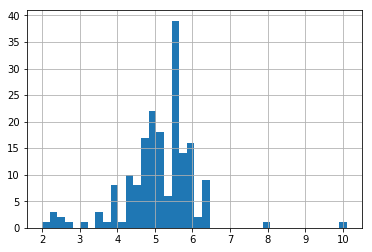

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Display Size (inch)'].hist(bins = 40)

In [14]:
df['Internal Memory'] = df['Internal Memory'].apply(extract_dimensions)

N/A
N/A
N/A
N/A


In [15]:
df.loc[df['Internal Memory'] == 'N/A', 'Internal Memory'] = 64

In [16]:
df['Main Camera Resolution'] = df['Main Camera Resolution'].apply(extract_resolution)

HTC UltraPixel Camera


In [17]:
df['Weight (g)'] = df['Weight (g)'].apply(extract_dimensions)

N/A
N/A
Support


In [18]:
df.loc[df['Weight (g)'] == 'N/A', 'Weight (g)'] = 140
df.loc[df['Weight (g)'] == 'Support', 'Weight (g)'] = 140

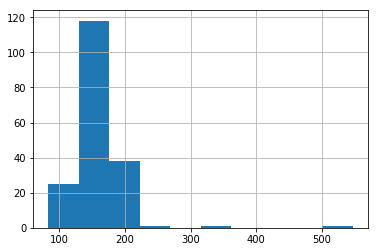

In [19]:
df['Weight (g)'].hist()

In [20]:
def extract_ram(column_value):
    regex = '\d*\.?\d+'

    
    matches = re.findall(regex, column_value)
    
    
    if len(matches)>0:
        if float(matches[0])>60:
            value = float(matches[0])/1000
        else:
            value = float(matches[0])
        
        return value
    else:
        print(column_value)
        return(column_value)
    

In [21]:
df['RAM'] = df['RAM'].apply(extract_ram)

N/A
N/A
N/A
N/A
N/A
N/A


In [22]:
df.loc[df['RAM'] == 'N/A', 'RAM'] = 2.0

In [23]:
df['RAM'].value_counts()

2.000    58
4.000    40
1.000    27
3.000    22
6.000     9
0.064     7
0.512     6
1.500     5
0.256     4
8.000     3
0.128     2
0.768     1
Name: RAM, dtype: int64

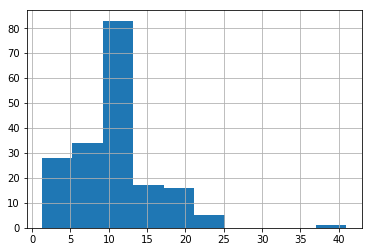

In [24]:
df.loc[df['Main Camera Resolution'] == 'HTC UltraPixel Camera', 'Main Camera Resolution'] = 13
df['Main Camera Resolution'].hist()

In [25]:
def get_brand(column_value):
    brand = column_value.split(' ')[0]
    return brand

df['Brand'] = df['Product_Number'].apply(get_brand)

In [26]:
def get_battery_capacity(column_value):
    regex = '\d{1}\,?\d{3}'
    matches = re.findall(regex, column_value)
    if len(matches)>0:
        capacity = matches[0].replace(',', '')
    else:
        capacity = 3000 #replacing with the mode
    return float(capacity)

In [27]:
df['Battery Capacity'] = df['Battery Capacity'].apply(get_battery_capacity)

In [28]:
df['price'] = df.price.astype(float)

In [29]:
fit_features = ['Main Camera Resolution', 'RAM', 'Internal Memory', 'Weight (g)', 'Display Size (inch)', 'Battery Capacity', 'price']

In [30]:
feature_df = df[fit_features]

In [31]:
feature_df.dtypes

Main Camera Resolution     object
RAM                        object
Internal Memory            object
Weight (g)                 object
Display Size (inch)       float64
Battery Capacity          float64
price                     float64
dtype: object

In [32]:
feature_df['RAM'] = pd.to_numeric(feature_df['RAM'])
feature_df['Main Camera Resolution'] = pd.to_numeric(feature_df['Main Camera Resolution'])
feature_df['Internal Memory'] = pd.to_numeric(feature_df['Internal Memory'])
feature_df['Weight (g)'] = pd.to_numeric(feature_df['Weight (g)'])

/Users/lisa/.pyenv/versions/py_360/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/lisa/.pyenv/versions/py_360/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lisa/.pyenv/versions/py_360/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [33]:
feature_df.dtypes

Main Camera Resolution    float64
RAM                       float64
Internal Memory           float64
Weight (g)                float64
Display Size (inch)       float64
Battery Capacity          float64
price                     float64
dtype: object

In [34]:
feature_df = pd.get_dummies(feature_df)

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
features = feature_df.as_matrix()
print(features)
clusters = AgglomerativeClustering(n_clusters=3,linkage='ward').fit_predict(features)

[[1.600e+01 4.000e+00 6.400e+01 ... 5.900e+00 3.340e+03 2.880e+03]
 [1.300e+01 4.000e+00 6.400e+01 ... 5.500e+00 3.000e+03 2.998e+03]
 [1.600e+01 4.000e+00 6.400e+01 ... 5.500e+00 3.000e+03 2.198e+03]
 ...
 [1.300e+01 2.000e+00 1.600e+01 ... 5.000e+00 2.330e+03 4.298e+03]
 [5.000e+00 2.560e-01 8.000e+00 ... 3.500e+00 1.400e+03 3.880e+04]
 [5.000e+00 2.560e-01 8.000e+00 ... 3.500e+00 1.400e+03 2.580e+04]]


In [37]:
clusters

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1])

(array([138.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,  44.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

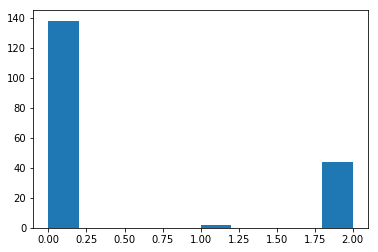

In [38]:
plt.hist(clusters)

In [39]:
feature_df[clusters==0].describe()

,Main Camera Resolution,RAM,Internal Memory,Weight (g),Display Size (inch),Battery Capacity,price
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,11.187391,2.444116,46.507246,154.184783,4.993551,2733.623188,2859.913043
std,4.927911,1.503935,70.353461,31.648558,0.894416,804.638870,1341.284685
min,1.300000,0.064000,2.000000,83.400000,2.000000,1020.000000,0.000000
25%,8.000000,1.000000,8.000000,138.000000,4.625000,2185.000000,1814.000000
50%,12.000000,2.000000,32.000000,148.500000,5.100000,3000.000000,2988.000000
75%,13.000000,4.000000,64.000000,169.600000,5.500000,3082.500000,3893.500000
max,23.000000,8.000000,512.000000,340.000000,8.000000,5200.000000,5298.000000


In [40]:
from sklearn.preprocessing import StandardScaler

(array([17., 45., 69., 35., 14.,  3.,  0.,  0.,  0.,  1.]),
 array([-2.11601291, -1.27579774, -0.43558256,  0.40463261,  1.24484778,
         2.08506295,  2.92527813,  3.7654933 ,  4.60570847,  5.44592364,
         6.28613881]),
 <a list of 10 Patch objects>)

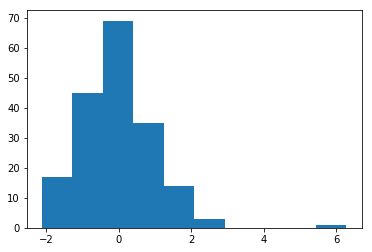

In [41]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)
np.shape(features)
plt.hist(features[:,5])

In [42]:
from sklearn.neighbors import KDTree

In [43]:
kdt = KDTree(features, leaf_size=20, metric='euclidean')

In [44]:
inquiry = 123
distances, neighbors = kdt.query([features[inquiry]], k=183, return_distance=True)  

neighbors = neighbors[0, 1::]
distances = distances[0, 1::]

print(neighbors)
print(distances)


[173 137 175  98 138 130 166 145 131  97 101 136 100 179 146 103 170 129
 115 177  93 163 161 167 122 156 121 113 102  92 143 141 171 124 147 105
 158 178 127 180 160 140 181  96  38  71 118 157 117  81  73  41 133 132
  49 151 114  18 159  16  80 174 150 128 144 119 110  95  28  83  40  72
 165  69  44  91 134 111   3  84  32  46 162  70  82  13  22 142  17  14
 172  59  42  77  53  21 109 108   8   1  74  62  29  87 116 112  86  94
  99   5 154 120   2 152  51 148  47  52  48  11  78  56  26  43  67 135
  64 149  33 153  75  57 104  24  85  36  90  12   0  63  65  45  88  54
  35  79  61  89  10  20  31 126  19  37   9 106   7  23  27  39  66  30
 168   6  68   4 169  76  15  50 107  34  60  55  25  58 183 176 139 164
 155 182]
[ 0.35714034  0.38932185  0.66464314  0.74169168  0.74892792  0.7786898
  0.77976119  0.81995143  0.83652879  0.84696459  0.85209006  0.87770557
  0.88844777  0.89381176  0.89512061  0.90717992  0.90847696  0.91878437
  0.94563657  0.95192208  0.95821939  0.99

In [45]:
display_features = fit_features + ['Product_Number']
print(fit_features)
df[display_features].iloc[inquiry]

['Main Camera Resolution', 'RAM', 'Internal Memory', 'Weight (g)', 'Display Size (inch)', 'Battery Capacity', 'price']


Main Camera Resolution                                   5
RAM                                                    1.5
Internal Memory                                          8
Weight (g)                                           134.2
Display Size (inch)                                    4.5
Battery Capacity                                      2100
price                                                 2898
Product_Number            Samsung GALAXY Express 2 (G3815)
Name: 123, dtype: object

In [46]:
for i in neighbors:
    print(df[display_features].iloc[i])
    print(' ')

Main Camera Resolution                         5
RAM                                            1
Internal Memory                                8
Weight (g)                                 137.2
Display Size (inch)                          4.5
Battery Capacity                            2000
price                                       3298
Product_Number            Samsung GALAXY Express
Name: 173, dtype: object
 
Main Camera Resolution                5
RAM                                   1
Internal Memory                       8
Weight (g)                          131
Display Size (inch)                 4.3
Battery Capacity                   2150
price                              2898
Product_Number            LG Optimus F5
Name: 137, dtype: object
 
Main Camera Resolution                      5
RAM                                         1
Internal Memory                             8
Weight (g)                                120
Display Size (inch)                       4.3
Batt

 
Main Camera Resolution                            13
RAM                                                3
Internal Memory                                   32
Weight (g)                                       165
Display Size (inch)                              5.5
Battery Capacity                                4000
price                                           1099
Product_Number            Xiaomi Redmi Note 4X(32GB)
Name: 52, dtype: object
 
Main Camera Resolution         16
RAM                             4
Internal Memory                64
Weight (g)                    167
Display Size (inch)           5.5
Battery Capacity             3000
price                        2088
Product_Number            Nokia 6
Name: 48, dtype: object
 
Main Camera Resolution                          19
RAM                                              4
Internal Memory                                 32
Weight (g)                                     143
Display Size (inch)                           

In [47]:
def get_nearest_neighbors(features, inquiry, num_neighbors = 10):
    distances, neighbors = kdt.query([features[inquiry]], k=num_neighbors, return_distance=True)
    return neighbors

In [48]:
neighbor_dict = {}
for inquiry in range(len(features)):
    index = df.iloc[inquiry]['product_name']
    neighbors = kdt.query([features[inquiry]], k=10, return_distance=False)
    neighbors = neighbors[0, 1::]
    product_numbers = df['product_name'].iloc[neighbors].values
    neighbor_dict[index] = list(np.array(product_numbers, dtype = str))

In [49]:
neighbor_dict['111180']

['118882',
 '110295',
 '91139',
 '98960',
 '129901',
 '107426',
 '135418',
 '151112',
 '7696']

In [50]:
with open('./data/similar.json', 'w') as outfile:
    json.dump(neighbor_dict, outfile)

In [51]:
data = pd.read_csv('/Users/lisa/client_projects/major-tom/reccommendation/data/csl.csv')

In [52]:
data.iloc[18].Product_Number

'LG Q6+'